In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime 
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from time import time
from statsmodels.tsa.ar_model import AutoReg

C:\Users\mirko\AppData\Local\Temp\ipykernel_26284\1073045949.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
# function that takes the arrays as input and create plots:
def plot_time_series(time, values, label):
    plt.figure(figsize=(10,6))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

In [3]:
def parser(s):
    return datetime.strptime(s, '%m/%d/%Y')

In [4]:
df = pd.read_csv("final.csv", parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


C:\Users\mirko\AppData\Local\Temp\ipykernel_26284\1236664304.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv("final.csv", parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [5]:
df.rename("production", inplace=True)

time
2015-02-01    0.124482
2015-03-01    0.599298
2015-04-01   -0.364810
2015-05-01    0.393570
2015-06-01    0.095709
2015-07-01   -0.013255
2015-08-01    0.369051
2015-09-01    0.160538
2015-10-01    0.048937
2015-11-01   -0.059472
2015-12-01   -2.623667
2016-01-01    0.237598
2016-02-01   -0.422016
2016-03-01    0.299973
2016-04-01   -0.432631
2016-05-01    0.855946
2016-06-01    0.051988
2016-07-01   -0.218794
2016-08-01    0.812531
2016-09-01    0.479466
2016-10-01   -1.761565
2016-11-01   -0.032261
2016-12-01    0.503095
2017-01-01   -0.198299
2017-02-01   -0.067635
2017-03-01    0.026019
2017-04-01    0.284880
2017-05-01   -0.258513
2017-06-01    0.678933
2017-07-01   -0.383514
2017-08-01   -0.012627
2017-09-01   -0.096854
2017-10-01    0.633280
2017-11-01   -0.192535
2017-12-01   -0.290806
2018-01-01    0.309227
2018-02-01    0.137843
2018-03-01    0.488732
2018-04-01   -0.102446
2018-05-01    0.061512
2018-06-01    0.363806
2018-07-01   -0.197159
2018-08-01   -0.452768
2018-0

In [7]:
#get data from begining as it is preapaired for model in previous notebook
start_date = pd.to_datetime('2015-02-01')
df = df[start_date:]

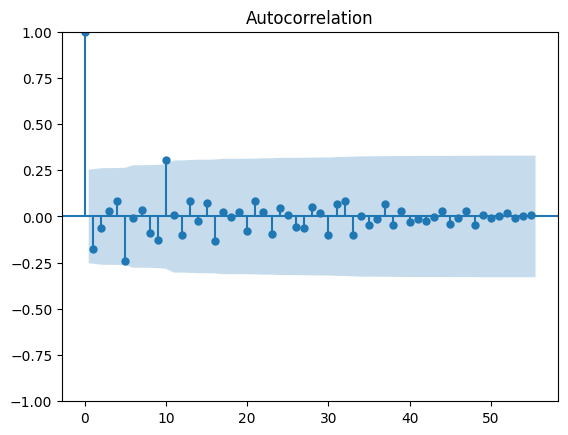

In [8]:
acf_plot = plot_acf(df, lags=55)

c:\Users\mirko\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


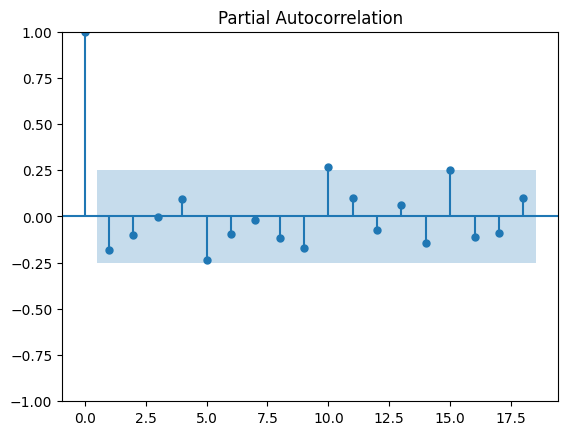

In [9]:
pacf_plot = plot_pacf(df)

In [10]:
#Training and Testing
train_end = datetime(2019,1,1) # train until 2019
test_end = datetime(2020,1,1)# test on last year
train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

In [11]:
ar_model = AutoReg(train_data, lags=14).fit()

c:\Users\mirko\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [107]:
print(ar_model.summary())


                            AutoReg Model Results                             
Dep. Variable:             production   No. Observations:                   48
Model:                    AutoReg(20)   Log Likelihood                   9.470
Method:               Conditional MLE   S.D. of innovations              0.173
Date:                Wed, 19 Oct 2022   AIC                             25.060
Time:                        21:10:04   BIC                             54.368
Sample:                    10-01-2016   HQIC                            34.019
                         - 01-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1462      0.094      1.549      0.121      -0.039       0.331
production.L1     -0.6531      0.147     -4.457      0.000      -0.940      -0.366
production.L2     -0.6399      0.173

In [12]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
# Make the predictions
pred = ar_model.predict(start=pred_start_date, end=pred_end_date, dynamic=False)
residuals = test_data - pred


c:\Users\mirko\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


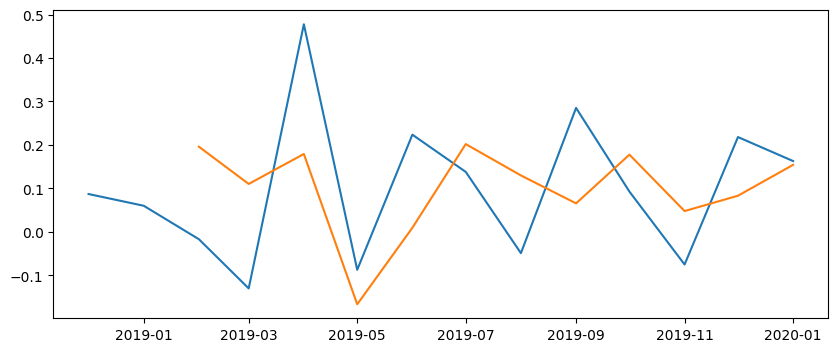

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df[-14:])
plt.plot(pred)

In [14]:
from sklearn.metrics import mean_squared_error, accuracy_score
test_score = mean_squared_error(test_data, pred)
print('Mean_squared_error', test_score)

Mean_squared_error 0.030741175405979215


In [15]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(0,0,8)) # AI order 0 , I = 0, MR=2
modelMA = model.fit()
print(modelMA.summary())

c:\Users\mirko\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mirko\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mirko\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                   48
Model:                 ARIMA(0, 0, 8)   Log Likelihood                 -37.666
Date:                Wed, 19 Oct 2022   AIC                             95.332
Time:                        22:18:51   BIC                            114.044
Sample:                    02-01-2015   HQIC                           102.403
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.062      0.075      0.940      -0.116       0.125
ma.L1         -0.2156     19.924     -0.011      0.991     -39.265      38.834
ma.L2          0.0377     14.913      0.003      0.9

c:\Users\mirko\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
predictionMA = modelMA.predict(pred_start_date, pred_end_date)
residuals = test_data - predictionMA

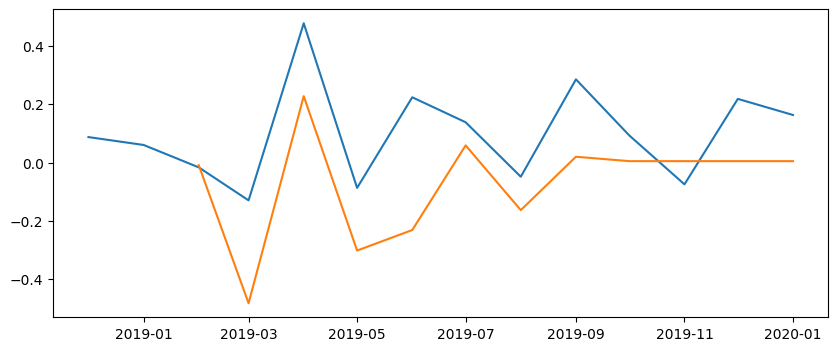

In [17]:
plt.figure(figsize=(10,4))
plt.plot(df[-14:])
plt.plot(predictionMA)

In [18]:
test_scoreMA = mean_squared_error(test_data, predictionMA)
print('Mean_squared_error', test_scoreMA)

Mean_squared_error 0.05127119319470178
